In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Voltage_Data.csv')
df = pd.read_csv(file_path)

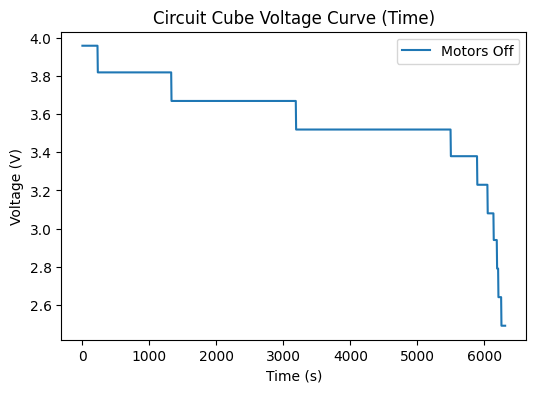

In [3]:
x = df['Seconds'].to_numpy()
y1 = df['Voltage (Motors Off)'].to_numpy()
y2 = df['Voltage (Motors On)'].to_numpy()
plt.figure(figsize=(6, 4))
#plt.plot(x, y1, label='Motors On')
plt.plot(x, y2, label='Motors Off')
plt.title('Circuit Cube Voltage Curve (Time)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

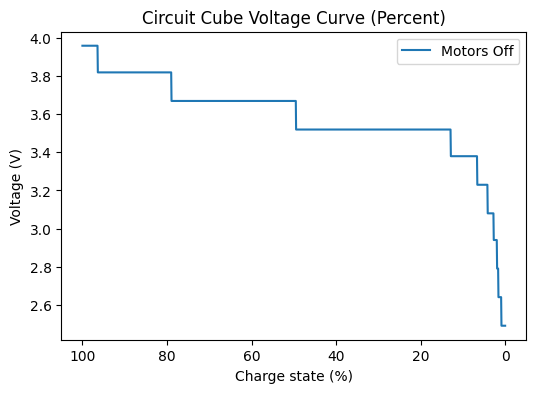

In [4]:
df['Percentage'] = ((1 - (df["Seconds"] - df["Seconds"].min()) / (df["Seconds"].max() - df["Seconds"].min())) * 100).round(2)
x_pct = df['Percentage'].to_numpy()
plt.figure(figsize=(6, 4))
plt.plot(x_pct, y2, label='Motors Off')
plt.title('Circuit Cube Voltage Curve (Percent)')
plt.xlabel('Charge state (%)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.gca().invert_xaxis()
plt.show()


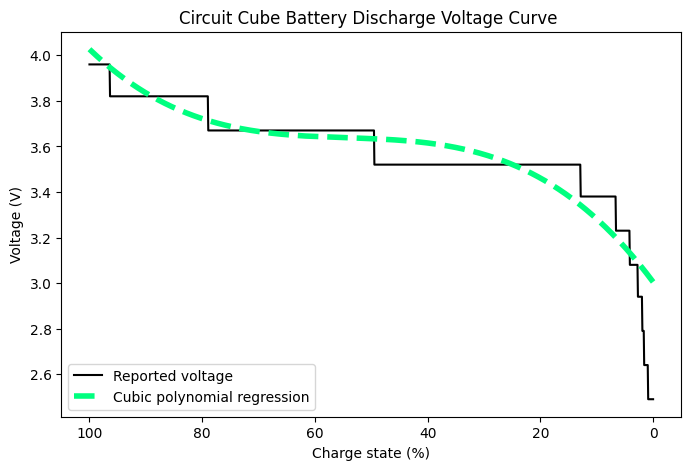

In [5]:
degree = 3
coefficients = np.polyfit(df['Percentage'], df['Voltage (Motors Off)'], deg=degree)
polynomial = np.poly1d(coefficients)
smooth_time = np.arange(0, 100.1, 0.1)
smooth_voltage = polynomial(smooth_time)

plt.figure(figsize=(8, 5))
plt.plot(x_pct, y2, label='Reported voltage', c='k')
plt.plot(smooth_time, smooth_voltage, label=f'Cubic polynomial regression', c='springgreen', lw=4, ls='--')
plt.title('Circuit Cube Battery Discharge Voltage Curve ')
plt.xlabel('Charge state (%)')
plt.ylabel('Voltage (V)')
plt.legend(loc='lower left')
plt.gca().invert_xaxis()
plt.show()

In [6]:
def percentage_from_voltage(coefficients, voltage): 
    coefficients1 = coefficients.copy() 
    coefficients1[-1] -= voltage
    all_solutions = np.roots(coefficients1)
    real_solutions = all_solutions[np.isreal(all_solutions)]
    print(real_solutions)
    if voltage >= 3.96 - (3.96 - 2.49)/2: 
        solution = np.max(real_solutions)
    if voltage < 3.96 - (3.96 - 2.49)/2: 
        solution = np.min(real_solutions)
    if solution > 100: 
        solution = 100
    if solution < 0: 
        solution = 0 
    print(f'{solution}% ')

percentage_from_voltage(coefficients, 3.5)

[23.08254495+0.j]
(23.082544952686998+0j)% 
